<a href="https://colab.research.google.com/github/Yshen-11/DUKE_XAI/blob/main/XAI_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Using , RuleFit, Greedy rule tree and FIGS Models from the imodels Library for Adult Income Prediction

In [1]:
!pip install imodels

In [ ]:
import imodels
print(dir(imodels))

['AdaBoostClassifier', 'AdaBoostRegressor', 'AutoInterpretableClassifier', 'AutoInterpretableRegressor', 'BART', 'BRLDiscretizer', 'BaseEstimator', 'BasicDiscretizer', 'BayesianRuleListClassifier', 'BayesianRuleSetClassifier', 'BoostedRulesClassifier', 'BoostedRulesRegressor', 'C45TreeClassifier', 'CLASSIFIERS', 'ClassifierMixin', 'DISCRETIZERS', 'DecisionTreeCCPClassifier', 'DecisionTreeCCPRegressor', 'DecisionTreeClassifier', 'DecisionTreeRegressor', 'DistilledRegressor', 'ESTIMATORS', 'FIGSClassifier', 'FIGSClassifierCV', 'FIGSRegressor', 'FIGSRegressorCV', 'FPLassoClassifier', 'FPLassoRegressor', 'FPSkopeClassifier', 'GreedyRuleListClassifier', 'GreedyTreeClassifier', 'GreedyTreeRegressor', 'HSDecisionTreeCCPClassifierCV', 'HSDecisionTreeCCPRegressorCV', 'HSOptimalTreeClassifier', 'HSOptimalTreeClassifierCV', 'HSTreeClassifier', 'HSTreeClassifierCV', 'HSTreeRegressor', 'HSTreeRegressorCV', 'MDLPDiscretizer', 'MarginalShrinkageLinearModelRegressor', 'MetaEstimatorMixin', 'OneRClassi

## Import Libraries
Here, we import the necessary libraries. pandas will be used for data handling, scikit-learn for model training and evaluation, and imodels for loading the FIGS, RuleFit, and ORL models.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imodels import FIGSClassifier, SLIMClassifier, GreedyTreeClassifier
from imodels import get_clean_dataset

## Load and Preprocess Data
We load the UCI Adult Income dataset and preprocess the data by removing missing values and encoding categorical features as numeric values using LabelEncoder.

In [3]:
X, y, feature_names = get_clean_dataset('adult')

le = LabelEncoder()
y_encoded = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fetching 1182 from openml


## Split Dataset
We split the dataset into training and testing sets to train the models and later evaluate their performance.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## SLIM

In [8]:
from sklearn.preprocessing import StandardScaler

# Data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SLIM model
slim_model = SLIMClassifier()

# Train the SLIM model
slim_model.fit(X_train_scaled, y_train)
y_pred = slim_model.predict(X_test_scaled)

print("SLIM Model Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/imodels/algebraic/slim.py:144: UserWarning: mosek solver required for mixed-integer exponential cone programming. Rounding non-integer coefficients instead
  warnings.warn("mosek solver required for mixed-integer exponential cone "


              precision    recall  f1-score   support

           0       0.83      0.94      0.88    152179
           1       0.65      0.37      0.47     47821

    accuracy                           0.80    200000
   macro avg       0.74      0.65      0.68    200000
weighted avg       0.78      0.80      0.78    200000



In [10]:
# Print features and their corresponding coefficients.
for feature, coef in zip(feature_names, slim_model.model_.coef_[0]):
    print(f'Feature: {feature}, Coefficient: {coef}')


Feature: age, Coefficient: 1
Feature: workclass, Coefficient: 0
Feature: fnlwgt, Coefficient: 0
Feature: education, Coefficient: 0
Feature: education-num, Coefficient: 1
Feature: marital-status, Coefficient: 0
Feature: occupation, Coefficient: 0
Feature: relationship, Coefficient: 0
Feature: race, Coefficient: 0
Feature: sex, Coefficient: 0
Feature: capitalgain, Coefficient: 1
Feature: capitalloss, Coefficient: 0
Feature: hoursperweek, Coefficient: 0
Feature: native-country, Coefficient: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


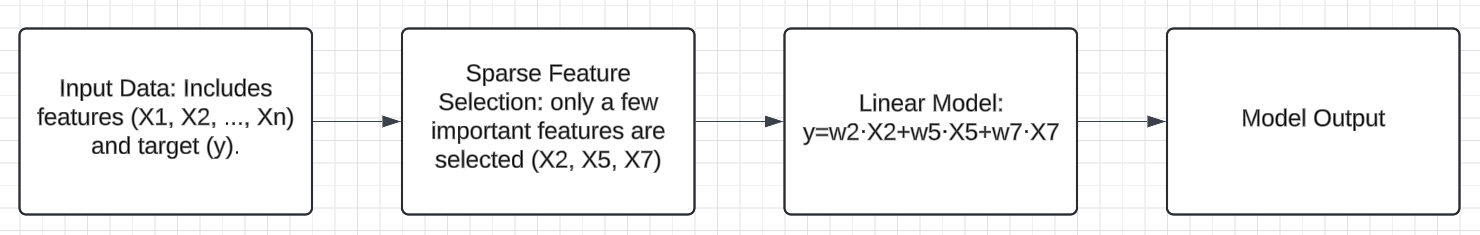

## Greedy rule tree

In [11]:
# Initialize and configure the Greedy rule tree model
model_greedy = GreedyTreeClassifier()

# Train the Greedy rule tree model
model_greedy.fit(X_train, y_train)
preds_greedy = model_greedy.predict(X_test)

# Print classification reports
print("Greedy Rule Tree Model Classification Report:")
print(classification_report(y_test, preds_greedy))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Greedy Rule Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88    152179
           1       0.61      0.62      0.61     47821

    accuracy                           0.81    200000
   macro avg       0.74      0.75      0.74    200000
weighted avg       0.81      0.81      0.81    200000



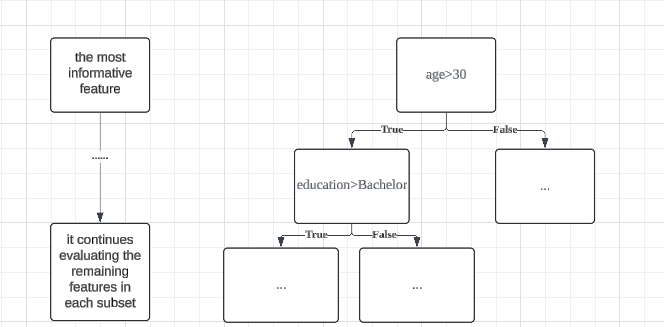

## FIGS Model

In [13]:
# Initialize and configure the FIGS model
model_figs = FIGSClassifier(max_rules=4)  # Limit FIGS to 4 rules

# Train the FIGS model
model_figs.fit(X_train, y_train)
preds_figs = model_figs.predict(X_test)

# Print classification reports
print("FIGS Model Classification Report:")
print(classification_report(y_test, preds_figs))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FIGS Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90    152179
           1       0.70      0.55      0.62     47821

    accuracy                           0.84    200000
   macro avg       0.79      0.74      0.76    200000
weighted avg       0.83      0.84      0.83    200000



### Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


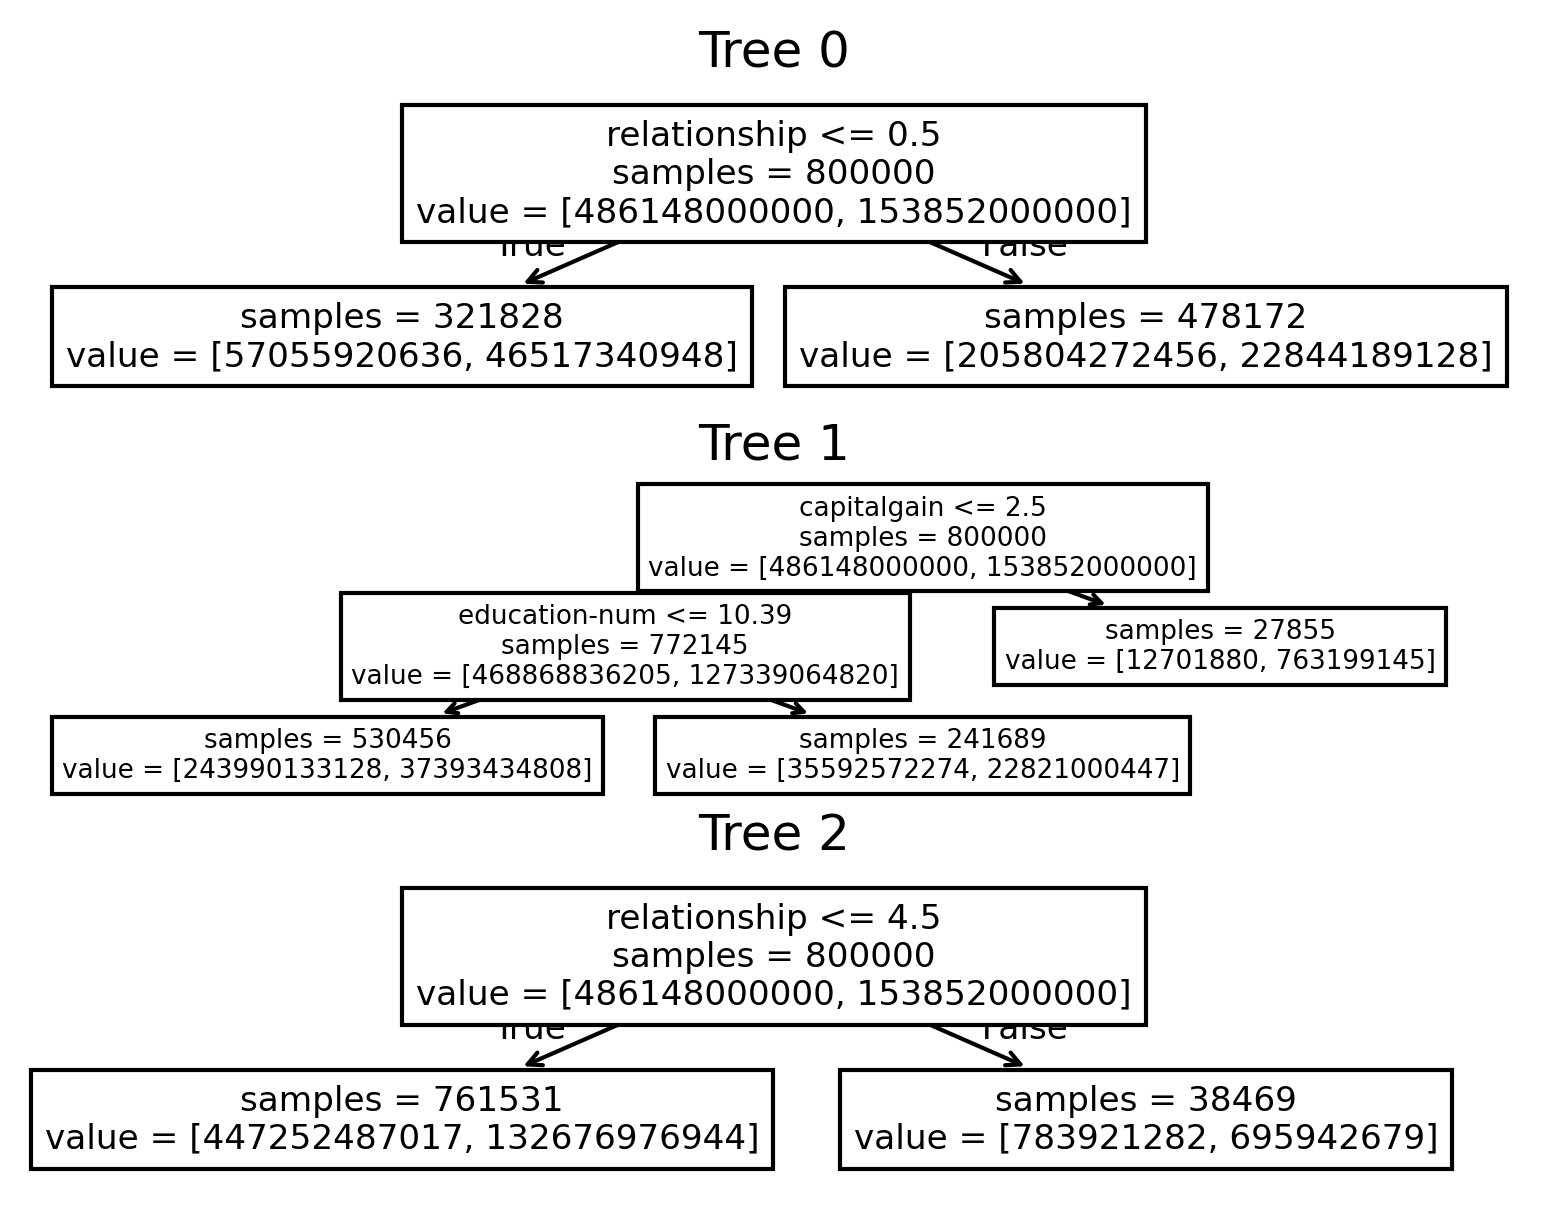

In [14]:
model_figs.plot(feature_names=feature_names, filename='figs_model.svg', dpi=300)